# DATA MINING Assignment #1. 

## Air B&B.xlsx 데이터에 대한 선형 회귀분석 수행 
### 목적 : Air B&B를 통해 대여한 주택의 1일 이용 가격 설명

### 2018122007 변수현

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.api as sm

## 1. Data input & preprocessing

In [3]:
airbnb = pd.read_excel('airbnb.xlsx')

In [323]:
airbnb.head()

,id,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,...,latitude,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,thumbnail_url,zipcode,bedrooms,beds
0,6901257,5.010635,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",3,1.0,Real Bed,strict,True,...,40.696524,-73.991617,Beautiful brownstone 1-bedroom,Brooklyn Heights,2,100.0,https://a0.muscache.com/im/pictures/6d7cbbf7-c...,11201,1.0,1.0
1,6304928,5.129899,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",7,1.0,Real Bed,strict,True,...,40.766115,-73.989040,Superb 3BR Apt Located Near Times Square,Hell's Kitchen,6,93.0,https://a0.muscache.com/im/pictures/348a55fe-4...,10019,3.0,3.0
2,7919400,4.976734,Apartment,Entire home/apt,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",5,1.0,Real Bed,moderate,True,...,40.808110,-73.943756,The Garden Oasis,Harlem,10,92.0,https://a0.muscache.com/im/pictures/6fae5362-9...,10027,1.0,3.0
3,13418779,6.620073,House,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",4,1.0,Real Bed,flexible,True,...,37.772004,-122.431619,Beautiful Flat in the Heart of SF!,Lower Haight,0,NaN,https://a0.muscache.com/im/pictures/72208dad-9...,94117,2.0,2.0
4,3808709,4.744932,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",2,1.0,Real Bed,moderate,True,...,38.925627,-77.034596,Great studio in midtown DC,Columbia Heights,4,40.0,NaN,20009,0.0,1.0


In [324]:
Airbnb = airbnb.copy()

In [325]:
#데이터 타입확인
Airbnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74111 entries, 0 to 74110
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   id                      74111 non-null  int64         
 1   log_price               74111 non-null  float64       
 2   property_type           74111 non-null  object        
 3   room_type               74111 non-null  object        
 4   amenities               74111 non-null  object        
 5   accommodates            74111 non-null  int64         
 6   bathrooms               73911 non-null  float64       
 7   bed_type                74111 non-null  object        
 8   cancellation_policy     74111 non-null  object        
 9   cleaning_fee            74111 non-null  bool          
 10  city                    74111 non-null  object        
 11  description             74105 non-null  object        
 12  first_review            58247 non-null  dateti

#### 1) "number_of_reviews"가 11개 이상인 데이터만 추출하기 

In [326]:
Airbnb.drop(Airbnb.loc[Airbnb["number_of_reviews"]<11].index, inplace =True)

In [328]:
Airbnb["number_of_reviews"].unique()

array([ 15, 159,  82,  29,  13,  12,  26,  57,  73,  14,  40, 248,  46,
        17, 138,  11,  44,  34,  85,  18,  31,  30,  19,  25,  22,  23,
        28,  32, 144,  16,  38, 105,  59,  67,  21, 120,  61,  87, 206,
        43, 104,  47,  63, 186,  36,  27, 167,  48, 102,  51, 126,  81,
        58,  72,  68, 107,  79,  98,  39, 187, 123,  70,  78,  55,  54,
        52,  42,  75, 128,  60,  90, 254, 135,  64,  99, 191,  24,  66,
       139, 125, 129,  74, 318,  33,  35,  37,  20,  93,  83,  45,  41,
        49, 289, 190,  62,  88, 127, 154, 118, 216, 136,  69, 314, 112,
        77,  56, 181,  53, 117, 101, 106, 255, 114, 110, 192,  76, 113,
        91, 182,  84, 146, 119,  86,  50,  71, 157,  95,  94, 158, 142,
        97, 194, 173, 122, 132, 171, 111, 161, 208, 131, 384, 133, 116,
       134, 148,  89, 156, 179, 150, 147, 145, 202, 258, 178, 200, 155,
       163, 149, 267, 100,  65, 207, 242, 172, 121, 180,  80,  92, 263,
       193, 251, 199, 103, 166, 237, 290, 137, 153,  96, 425, 18

In [329]:
#1부터 reindex 
Airbnb = Airbnb.reset_index(drop=True)

In [330]:
Airbnb.head()

,id,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,...,latitude,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,thumbnail_url,zipcode,bedrooms,beds
0,11825529,4.418841,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",3,1.0,Real Bed,moderate,True,...,33.980454,-118.462821,Beach Town Studio and Parking!!!11h,NaN,15,97.0,https://a0.muscache.com/im/pictures/4c920c60-4...,90292,1.0,1.0
1,180792,4.787492,House,Private room,"{TV,""Cable TV"",""Wireless Internet"",""Pets live ...",2,1.0,Real Bed,moderate,True,...,37.781128,-122.501095,Cozy Garden Studio - Private Entry,Richmond District,159,99.0,https://a0.muscache.com/im/pictures/0ed6c128-7...,94121,1.0,1.0
2,5578513,4.605170,Apartment,Private room,"{Internet,""Wireless Internet"",""Air conditionin...",2,1.0,Real Bed,strict,True,...,40.723883,-73.983880,Large East Village Bedroom To Let!,Alphabet City,82,93.0,https://a0.muscache.com/im/pictures/21726900/1...,10009,1.0,1.0
3,17423675,5.010635,House,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",4,1.5,Real Bed,strict,True,...,33.875862,-118.403293,Sand Section Beach Bungalow,Hermosa Beach,29,97.0,NaN,90254,2.0,2.0
4,2658946,5.298317,Apartment,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",6,1.5,Real Bed,strict,True,...,38.919630,-77.031189,Charming 2 bdrm in trendy U/14th streets w/par...,U Street Corridor,13,89.0,NaN,20009,2.0,3.0


#### 2) “property_type”은 ‘House’, ‘Aprtment’, ’Other’ 등의 3범주로 변환하기 

In [331]:
others = list(Airbnb["property_type"].unique())[2:]

In [334]:
others

['Loft',
 'Townhouse',
 'Condominium',
 'Guest suite',
 'Bungalow',
 'Dorm',
 'Other',
 'Bed & Breakfast',
 'Boutique hotel',
 'Camper/RV',
 'Villa',
 'Timeshare',
 'Guesthouse',
 'In-law',
 'Serviced apartment',
 'Castle',
 'Hostel',
 'Boat',
 'Cabin',
 'Treehouse',
 'Tent',
 'Yurt',
 'Chalet',
 'Earth House',
 'Hut',
 'Cave',
 'Vacation home',
 'Train',
 'Tipi',
 'Island']

In [332]:
Airbnb["property_type"].replace(others,"Other",inplace=True)

In [333]:
Airbnb["property_type"].unique()

array(['Apartment', 'House', 'Other'], dtype=object)

#### 3) bed_type”은 ‘Bed’, ‘Other’ 등의 2범주로 변환하시오.

In [336]:
Airbnb["bed_type"].unique()

array(['Real Bed', 'Futon', 'Pull-out Sofa', 'Couch', 'Airbed'],
      dtype=object)

In [337]:
bed = ["Real Bed","Airbed"]
other = ["Futon","Pull-out Sofa","Couch"]

In [338]:
Airbnb["bed_type"].replace(bed,"Bed",inplace=True)
Airbnb["bed_type"].replace(other,"Other",inplace=True)

In [339]:
Airbnb["bed_type"].unique()

array(['Bed', 'Other'], dtype=object)

#### 4) “amenities”는 amenities에 포함된 편의시설의 갯수로 정의하시오. 
* 해당 데이터에 포함된 comma의 개수에 1을 더하여 정의함 

In [340]:
Airbnb["amenities"].head()

0    {TV,Internet,"Wireless Internet","Air conditio...
1    {TV,"Cable TV","Wireless Internet","Pets live ...
2    {Internet,"Wireless Internet","Air conditionin...
3    {TV,"Cable TV",Internet,"Wireless Internet",Ki...
4    {TV,"Cable TV",Internet,"Wireless Internet","A...
Name: amenities, dtype: object

In [341]:
Airbnb["amenities"] = list(map(lambda x: x.count(','),Airbnb["amenities"]))

In [342]:
Airbnb["amenities"] = Airbnb["amenities"] +1

In [343]:
Airbnb["amenities"]

0        21
1        21
2        15
3        22
4        25
         ..
29011    24
29012    13
29013    16
29014    31
29015    18
Name: amenities, Length: 29016, dtype: int64

#### 5) “description” 변수는 문자열의 길이로 정의하시오. (더 긴 소개문을 제공한 곳은더 비싼지 여부 확인해보기 위해)

In [344]:
Airbnb["description"].head()

0    Warm and cozy studio with full kitchen and bat...
1    Garden Studio with private entrance from the s...
2    This is a bright bedroom in an historic buildi...
3    A 1044 sq. ft., 1950's beach house. 3 Blocks f...
4    Amazing location at the heart of U street and ...
Name: description, dtype: object

In [345]:
Airbnb["description"] = list(map(lambda x: len(x),Airbnb["description"]))

In [346]:
Airbnb["description"]

0        1000
1        1000
2        1000
3        1000
4        1000
         ... 
29011    1002
29012    1000
29013     302
29014    1000
29015    1000
Name: description, Length: 29016, dtype: int64

#### 6) “latitude”와 “longitude”를 이용하여 “도심의 중심위치로부터의 거리” 라는 변수를추가하시오
* 구글링을 통해 도심의 위도, 경도를 찾고, 도심의 중심위치로부터의 거리를 계산함. 
* 거리의 계산은 haversine 패키지를 활용함 
* 해당 변수를 "distance"라는 이름으로 추가함. 

In [347]:
Airbnb["city"].unique()

array(['LA', 'SF', 'NYC', 'DC', 'Chicago', 'Boston'], dtype=object)

In [348]:
Airbnb["latitude"].head()

0    33.980454
1    37.781128
2    40.723883
3    33.875862
4    38.919630
Name: latitude, dtype: float64

In [349]:
Airbnb["longitude"].head()

0   -118.462821
1   -122.501095
2    -73.983880
3   -118.403293
4    -77.031189
Name: longitude, dtype: float64

In [350]:
# google map을 이용하여 도심의 위도, 경도를 찾음. 
center= {"SF":(38.13132033610501, -122.43477892998327),
         "LA":(34.43070450294101, -117.64473967338925),
         "DC":(38.647985076070995, -77.45675069500327),
         "NYC":(41.15901629969464, -73.85323503082833),
         "Chicago":(42.258004008894375, -87.5861457435406),
         "Boston":(42.48526790137171, -71.28243440182642)}  

In [351]:
!pip install haversine
from haversine import haversine

In [352]:
LA_index = Airbnb[Airbnb["city"]=="LA"].index.tolist()
SF_index = Airbnb[Airbnb["city"]=="SF"].index.tolist()
DC_index = Airbnb[Airbnb["city"]=="DC"].index.tolist()
NYC_index = Airbnb[Airbnb["city"]=="NYC"].index.tolist()
Chicago_index = Airbnb[Airbnb["city"]=="Chicago"].index.tolist()
Boston_index = Airbnb[Airbnb["city"]=="Boston"].index.tolist()

In [353]:
for i in LA_index:
    center = (34.43070450294101, -117.64473967338925)
    position = (Airbnb.loc[i,"latitude"],Airbnb.loc[i,"longitude"])
    Airbnb.loc[i,"distance"] = round(haversine(position,center,unit="km"),4)

In [354]:
for i in SF_index:
    center = (38.13132033610501, -122.43477892998327)
    position = (Airbnb.loc[i,"latitude"],Airbnb.loc[i,"longitude"])
    Airbnb.loc[i,"distance"] = round(haversine(position,center,unit="km"),4)

In [355]:
for i in DC_index:
    center = (38.647985076070995, -77.45675069500327)
    position = (Airbnb.loc[i,"latitude"],Airbnb.loc[i,"longitude"])
    Airbnb.loc[i,"distance"] = round(haversine(position,center,unit="km"),4)

In [356]:
for i in NYC_index:
    center = (41.15901629969464, -73.85323503082833)
    position = (Airbnb.loc[i,"latitude"],Airbnb.loc[i,"longitude"])
    Airbnb.loc[i,"distance"] = round(haversine(position,center,unit="km"),4)

In [357]:
for i in Chicago_index:
    center = (42.258004008894375, -87.5861457435406)
    position = (Airbnb.loc[i,"latitude"],Airbnb.loc[i,"longitude"])
    Airbnb.loc[i,"distance"] = round(haversine(position,center,unit="km"),4)

In [358]:
for i in Boston_index:
    center = (42.48526790137171, -71.28243440182642)
    position = (Airbnb.loc[i,"latitude"],Airbnb.loc[i,"longitude"])
    Airbnb.loc[i,"distance"] = round(haversine(position,center,unit="km"),4)

In [83]:
Airbnb.drop("center_distance",axis=1,inplace=True)

In [359]:
Airbnb["distance"].head()

0    90.3674
1    39.3714
2    49.6134
3    93.1578
4    47.6761
Name: distance, dtype: float64

#### 7) 가격비(price_ratio) 변수 생성 (상대적인 가격)
* 로그 가격비 = log(원가격/도시별 평균 가격) x 100 
* 원가격 = $e^{logprice}$
* 도시별 평균 가격 = 같은 도시내의 원가격의 평균값

In [360]:
# 원가격 파생변수 추가 
Airbnb["raw_price"] = np.exp(Airbnb["log_price"])

In [361]:
#도시별 평균 가격
mean_price = Airbnb.groupby("city").mean()[["raw_price"]]

In [362]:
mean_price

,raw_price
city,
Boston,152.486037
Chicago,116.881828
DC,137.181602
LA,140.122352
NYC,142.604285
SF,189.819051


In [363]:
mean_price.loc["LA","raw_price"]

140.12235216001903

In [364]:
import math
math.log(83/140.122352*100)

4.081494809983948

In [365]:
#가격비 변수 생성
for i in LA_index:
    Airbnb["price_ratio"]=np.log(Airbnb["raw_price"]/mean_price.loc["LA","raw_price"]*100)
    
for i in SF_index:
    Airbnb["price_ratio"]=np.log(Airbnb["raw_price"]/mean_price.loc["SF","raw_price"]*100) 

for i in DC_index:
    Airbnb["price_ratio"]=np.log(Airbnb["raw_price"]/mean_price.loc["DC","raw_price"]*100) 

for i in NYC_index:
    Airbnb["price_ratio"]=np.log(Airbnb["raw_price"]/mean_price.loc["NYC","raw_price"]*100)

for i in Boston_index:
    Airbnb["price_ratio"]=np.log(Airbnb["raw_price"]/mean_price.loc["Boston","raw_price"]*100)

for i in Chicago_index:
    Airbnb["price_ratio"]=np.log(Airbnb["raw_price"]/mean_price.loc["Chicago","raw_price"]*100)

In [366]:
Airbnb["price_ratio"]

0        4.262847
1        4.631499
2        4.449177
3        4.854642
4        5.142324
           ...   
29011    4.979805
29012    4.092502
29013    4.887432
29014    5.064363
29015    4.696037
Name: price_ratio, Length: 29016, dtype: float64

#### 8) 추가적인 전처리 
* 필요없는 변수 삭제 
* 결측치 제거 (데이터 손실을 최소화 하기위해 변수 삭제 이후 진행)

In [117]:
Airbnb.head()

,id,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,city,...,name,neighbourhood,number_of_reviews,review_scores_rating,thumbnail_url,zipcode,bedrooms,beds,distance,price_ratio
0,11825529,Apartment,Entire home/apt,21,3,1.0,Bed,moderate,True,LA,...,Beach Town Studio and Parking!!!11h,NaN,15,97.0,https://a0.muscache.com/im/pictures/4c920c60-4...,90292,1.0,1.0,90.3674,4.262847
1,180792,House,Private room,21,2,1.0,Bed,moderate,True,SF,...,Cozy Garden Studio - Private Entry,Richmond District,159,99.0,https://a0.muscache.com/im/pictures/0ed6c128-7...,94121,1.0,1.0,39.3714,4.631499
2,5578513,Apartment,Private room,15,2,1.0,Bed,strict,True,NYC,...,Large East Village Bedroom To Let!,Alphabet City,82,93.0,https://a0.muscache.com/im/pictures/21726900/1...,10009,1.0,1.0,49.6134,4.449177
3,17423675,House,Entire home/apt,22,4,1.5,Bed,strict,True,LA,...,Sand Section Beach Bungalow,Hermosa Beach,29,97.0,NaN,90254,2.0,2.0,93.1578,4.854642
4,2658946,Apartment,Entire home/apt,25,6,1.5,Bed,strict,True,DC,...,Charming 2 bdrm in trendy U/14th streets w/par...,U Street Corridor,13,89.0,NaN,20009,2.0,3.0,47.6761,5.142324


* 로그가격비를 종속변수로 하기로 했기 때문에 log_price & raw_price 변수는 삭제 

In [115]:
Airbnb.drop("log_price",axis=1,inplace=True)

In [116]:
Airbnb.drop("raw_price",axis=1,inplace=True)

* numeric하거나 categorical한 의미를 가지고 있지 않으며, 단순 식별의 의미를 가지고 있는 변수 삭제 

In [119]:
Airbnb.drop("id",axis=1,inplace=True)
Airbnb.drop("thumbnail_url",axis=1,inplace=True)     #썸네일 url 제거
Airbnb.drop("name",axis=1,inplace=True)              #이름 제거 

* latitude,longitude는 numeric한 의미를 가지고 있다고 보기 어려우며, city라는 카테고리 변수를 통해 표현되므로 삭제 

In [120]:
Airbnb.drop("latitude",axis=1,inplace=True)
Airbnb.drop("longitude",axis=1,inplace=True)

* 카테고리 변수 중 level이 너무 크고, 해당 level을 조절하기 어려운 변수들 삭제 

In [124]:
#feature count
for i in Airbnb.columns[:].tolist():
    print(i, ':', len(Airbnb[i].astype(str).value_counts()))

property_type : 3
room_type : 3
amenities : 69
accommodates : 16
bathrooms : 18
bed_type : 2
cancellation_policy : 5
cleaning_fee : 2
city : 6
description : 1100
first_review : 2480
host_has_profile_pic : 3
host_identity_verified : 3
host_response_rate : 70
host_since : 2900
instant_bookable : 2
last_review : 855
neighbourhood : 544
number_of_reviews : 360
review_scores_rating : 41
zipcode : 580
bedrooms : 12
beds : 19
distance : 28062
price_ratio : 565


In [166]:
# neighborhood 변수 삭제 (level의수가 너무 크고, 특별히 주요한 level이 없음)
Airbnb.drop("neighbourhood",axis=1,inplace=True)

In [171]:
# zipcode 변수또한 int형이지만 numeric한 의미를 가지고 있지 않으며, level의 수가 크고 특별히 주요한 level은 없음 
Airbnb.drop("zipcode",axis=1,inplace=True)

In [174]:
Airbnb.head()

,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,city,description,...,host_response_rate,host_since,instant_bookable,last_review,number_of_reviews,review_scores_rating,bedrooms,beds,distance,price_ratio
0,Apartment,Entire home/apt,21,3,1.0,Bed,moderate,True,LA,1000,...,1.0,2003-03-17,t,2021-04-17,15,97.0,1.0,1.0,90.3674,4.262847
1,House,Private room,21,2,1.0,Bed,moderate,True,SF,1000,...,1.0,2004-06-15,f,2024-09-17,159,99.0,1.0,1.0,39.3714,4.631499
2,Apartment,Private room,15,2,1.0,Bed,strict,True,NYC,1000,...,1.0,2027-03-13,f,2015-11-16,82,93.0,1.0,1.0,49.6134,4.449177
3,House,Entire home/apt,22,4,1.5,Bed,strict,True,LA,1000,...,1.0,2011-06-15,f,2018-11-16,29,97.0,2.0,2.0,93.1578,4.854642
4,Apartment,Entire home/apt,25,6,1.5,Bed,strict,True,DC,1000,...,1.0,2012-10-12,t,1930-04-17,13,89.0,2.0,3.0,47.6761,5.142324


In [175]:
#결측치 확인 
Airbnb.isnull().sum()

property_type                0
room_type                    0
amenities                    0
accommodates                 0
bathrooms                  101
bed_type                     0
cancellation_policy          0
cleaning_fee                 0
city                         0
description                  0
first_review                22
host_has_profile_pic        64
host_identity_verified      64
host_response_rate        1597
host_since                  64
instant_bookable             0
last_review                  0
number_of_reviews            0
review_scores_rating        22
bedrooms                    42
beds                        18
distance                     0
price_ratio                  0
dtype: int64

* 결측치 제거 - 결측치의 개수가 전체 행의 0.5%미만인 변수의 경우 결측치가 포함된 행 삭제, 0.5%이상인 경우 평균치로 처리 

In [177]:
Airbnb.dropna(subset=['bathrooms','first_review','host_has_profile_pic','host_identity_verified','host_since','review_scores_rating','bedrooms','beds'],inplace=True)

In [179]:
Airbnb.fillna(0.5,inplace=True)

In [180]:
Airbnb.isnull().sum()

property_type             0
room_type                 0
amenities                 0
accommodates              0
bathrooms                 0
bed_type                  0
cancellation_policy       0
cleaning_fee              0
city                      0
description               0
first_review              0
host_has_profile_pic      0
host_identity_verified    0
host_response_rate        0
host_since                0
instant_bookable          0
last_review               0
number_of_reviews         0
review_scores_rating      0
bedrooms                  0
beds                      0
distance                  0
price_ratio               0
dtype: int64

## 2. 로그가격비를 종속변수로 한 선형회귀분석 수행 

#### 1) 범주형 변수 처리 
 * property_type , room_type, bed_type, cleaning_fee, city, host_has_profile_pic, host_identity_verified, instant_bookable -> dummy variable로 만들었음
 * cancellation_policy : 정도를 나타내는 변수이므로 label encoding을 진행함

In [184]:
Airbnb_dum = pd.get_dummies(Airbnb, columns=["room_type", "cleaning_fee", "city", "host_has_profile_pic", "host_identity_verified", "instant_bookable"],drop_first=True)

In [188]:
Airbnb_dum['property_type'] = Airbnb_dum['property_type'].astype('category')
Airbnb_dum['bed_type'] = Airbnb_dum['bed_type'].astype('category')

In [189]:
Airbnb_dum['property_type'].cat.reorder_categories(['Other','Apartment','House'], inplace=True)
Airbnb_dum['bed_type'].cat.reorder_categories(['Other','Bed'], inplace=True)

In [190]:
Airbnb_dum = pd.get_dummies(Airbnb_dum, columns=["property_type","bed_type"],drop_first=True)

In [197]:
cp = list(Airbnb_dum["cancellation_policy"].unique())
cp

['moderate', 'strict', 'flexible', 'super_strict_30', 'super_strict_60']

In [198]:
#cancellation pliciy가 strick한 정도에 따라 rating
Airbnb_dum["cancellation_policy"].replace(cp,[1,2,0,3,4],inplace=True)

In [207]:
Airbnb_dum.head()

,amenities,accommodates,bathrooms,cancellation_policy,description,first_review,host_response_rate,host_since,last_review,number_of_reviews,...,city_DC,city_LA,city_NYC,city_SF,host_has_profile_pic_t,host_identity_verified_t,instant_bookable_t,property_type_Apartment,property_type_House,bed_type_Bed
0,21,3,1.0,1,1000,2010-03-17,1.0,2003-03-17,2021-04-17,15,...,0,1,0,0,1,0,1,1,0,1
1,21,2,1.0,1,1000,2013-02-16,1.0,2004-06-15,2024-09-17,159,...,0,0,0,1,1,0,0,0,1,1
2,15,2,1.0,2,1000,2028-04-13,1.0,2027-03-13,2015-11-16,82,...,0,0,1,0,1,1,0,1,0,1
3,22,4,1.5,2,1000,2002-07-15,1.0,2011-06-15,2018-11-16,29,...,0,1,0,0,1,1,0,0,1,1
4,25,6,1.5,2,1000,2018-02-17,1.0,2012-10-12,1930-04-17,13,...,1,0,0,0,1,1,1,1,0,1


#### 2-1) 잠정적인 full model fitting (interaction 적용 X) 
* 시계열 변수를 제외한 모든 변수를 독립변수로 가지는 모델
* R-square = 0.633
* 해당 결과의 p-value에 따르면 ,property_type_Apartment, cleaning_fee_True , description,host_has_profile_pic_t,host_identity_verified_t,number_of_reviews 는 종속변수에 유의미한 영향을 주지 않음. 

In [208]:
Airbnb_dum.columns= ['amenities', 'accommodates', 'bathrooms', 'cancellation_policy',
       'description', 'first_review', 'host_response_rate', 'host_since',
       'last_review', 'number_of_reviews', 'review_scores_rating', 'bedrooms',
       'beds', 'distance', 'price_ratio', 'room_type_Private',
       'room_type_Shared', 'cleaning_fee_True', 'city_Chicago', 'city_DC',
       'city_LA', 'city_NYC', 'city_SF', 'host_has_profile_pic_t',
       'host_identity_verified_t', 'instant_bookable_t',
       'property_type_Apartment', 'property_type_House', 'bed_type_Bed']

In [213]:
model1 = smf.ols(formula = 'price_ratio ~ property_type_Apartment+property_type_House+room_type_Private+room_type_Shared+amenities+accommodates+bathrooms+bed_type_Bed+cancellation_policy+cleaning_fee_True+city_Chicago+city_DC+city_LA+city_NYC+city_SF+description+host_has_profile_pic_t+host_identity_verified_t+host_response_rate+instant_bookable_t+number_of_reviews+review_scores_rating+bedrooms+beds+distance',
                data = Airbnb_dum)
result1=model1.fit()

In [214]:
result1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            price_ratio   R-squared:                       0.633
Model:                            OLS   Adj. R-squared:                  0.633
Method:                 Least Squares   F-statistic:                     1984.
Date:                Mon, 29 Mar 2021   Prob (F-statistic):               0.00
Time:                        01:03:27   Log-Likelihood:                -13357.
No. Observations:               28785   AIC:                         2.677e+04
Df Residuals:                   28759   BIC:                         2.698e+04
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                    2.8578      0.090     31.593      0.000       2.680       3.035
property_type_Apartment     -0.0065      0.007     -0.879      0.379      -0.021       0.008
property_type_House         -0.0689      0.008     -8.448      0.000      -0.085      -0.053
room_type_Private           -0.5941      0.006   -103.818      0.000      -0.605      -0.583
room_type_Shared            -1.0936      0.017    -65.421      0.000      -1.126      -1.061
amenities                    0.0034      0.000      9.424      0.000       0.003       0.004
accommodates                 0.0662      0.002     29.920      0.000       0.062       0.071
bathrooms                    0.1264      0.005     24.664      0.000       0.116       0.136
bed_type_Bed                 0.0531      0.015      3.526      0.000       0.024       0.083
cancellation_policy          0.0462      0.003     13.800      0.000       0.040       0.053
cleaning_fee_True           -0.0032      0.007     -0.485      0.627      -0.016       0.010
city_Chicago                -0.4282      0.014    -30.186      0.000      -0.456      -0.400
city_DC                     -0.2677      0.015    -17.917      0.000      -0.297      -0.238
city_LA                     -0.3930      0.019    -20.696      0.000      -0.430      -0.356
city_NYC                    -0.1286      0.013     -9.929      0.000      -0.154      -0.103
city_SF                      0.1486      0.013     11.123      0.000       0.122       0.175
description               1.632e-05   1.03e-05      1.585      0.113   -3.87e-06    3.65e-05
host_has_profile_pic_t      -0.0413      0.073     -0.566      0.571      -0.184       0.102
host_identity_verified_t     0.0071      0.006      1.238      0.216      -0.004       0.018
host_response_rate          -0.1859      0.017    -11.216      0.000      -0.218      -0.153
instant_bookable_t          -0.0397      0.005     -7.708      0.000      -0.050      -0.030
number_of_reviews        -1.735e-05   4.92e-05     -0.352      0.725      -0.000    7.92e-05
review_scores_rating         0.0160      0.001     30.650      0.000       0.015       0.017
bedrooms                     0.1618      0.004     36.960      0.000       0.153       0.170
beds                        -0.0407      0.003    -12.635      0.000      -0.047      -0.034
distance                     0.0043      0.000     14.772      0.000       0.004       0.005
==============================================================================
Omnibus:                     1182.968   Durbin-Watson:                   1.990
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2994.003
Skew:                           0.215   Prob(JB):                         0.00
Kurtosis:                       4.520   Cond. No.                     

#### 2-2) full model 진단
* qqplot을 통해 해당 모델이 정규분포보다 양 꼬리가 두꺼운 분포를 띄고 있음을 알 수 있음. 
* residual ~ fitted value plot을 통해 등분산성을 만족함을 알 수 있음

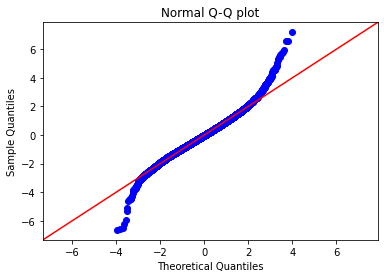

In [216]:
# 모델 진단 - 정규성 
sm.qqplot(result1.resid, fit=True, line='45')
plt.title("Normal Q-Q plot")
plt.show()

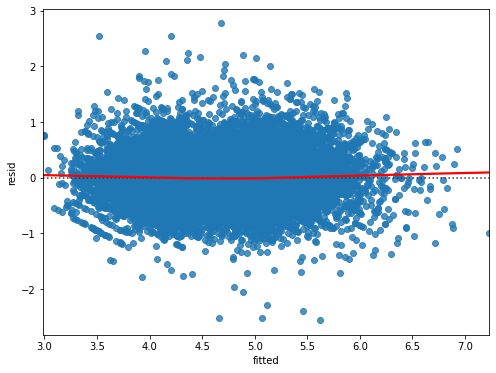

In [215]:
# 모델 진단 - 등분산성
plt.subplots(figsize=(8,6))
eqvar = pd.DataFrame({'fitted': result1.fittedvalues, 'resid' : result1.resid })
sns.residplot(x='fitted', y='resid', data=eqvar, line_kws={'color':'red'}, lowess=True)
plt.show()

#### 3) feature selection (backward)
* feature selecton 정의된 파일 사용해서 feature selection 진행 
* feature selection에 따라 제거된 변수 : number_of_reviews , cleaning_fee_True, host_has_profile_pic_t,property_type_Apartment,host_identity_verified_t로 앞선 fitting 결과에서 p-value가 높게 나왔던 변수들이랑 대부분 일치한다. 

In [237]:
import feature_selection as fsel        #feature selection definition 파일 

X =Airbnb_dum.drop("price_ratio",axis=1) 
X = X.drop("first_review",axis =1)
X = X.drop("last_review",axis =1)
X = X.drop("host_since",axis =1)         #독립변수만 지정
y = Airbnb_dum['price_ratio']

In [238]:
fsel.backwardSelection(X, y, model_type='linear', elimination_criteria='aic')

Character Variables (Dummies Generated, First Dummies Dropped): []
Eliminated : number_of_reviews
Eliminated : cleaning_fee_True
Eliminated : host_has_profile_pic_t
Eliminated : property_type_Apartment
Eliminated : host_identity_verified_t
Eliminated : description
Regained :  description
                            OLS Regression Results                            
Dep. Variable:            price_ratio   R-squared:                       0.633
Model:                            OLS   Adj. R-squared:                  0.633
Method:                 Least Squares   F-statistic:                     2481.
Date:                Mon, 29 Mar 2021   Prob (F-statistic):               0.00
Time:                        01:58:04   Log-Likelihood:                -13358.
No. Observations:               28785   AIC:                         2.676e+04
Df Residuals:                   28764   BIC:                         2.693e+04
Df Model:                          20                                         


['intercept',
 'amenities',
 'accommodates',
 'bathrooms',
 'cancellation_policy',
 'description',
 'host_response_rate',
 'review_scores_rating',
 'bedrooms',
 'beds',
 'distance',
 'room_type_Private',
 'room_type_Shared',
 'city_Chicago',
 'city_DC',
 'city_LA',
 'city_NYC',
 'city_SF',
 'instant_bookable_t',
 'property_type_House',
 'bed_type_Bed']

#### 4) model 2. feature selection 진행한 것 
* R-square = 0.633
* p-value가 0.05이상인, 종속변수에 끼치는 영향이 유의하지 않은 변수는 독립변수에서 제외됨.

In [239]:
model2 = smf.ols(formula = 'price_ratio ~ property_type_House+room_type_Private+room_type_Shared+amenities+accommodates+bathrooms+bed_type_Bed+cancellation_policy+city_Chicago+city_DC+city_LA+city_NYC+city_SF+description+host_response_rate+instant_bookable_t+review_scores_rating+bedrooms+beds+distance',
                data = Airbnb_dum)
result2=model2.fit()

In [240]:
result2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            price_ratio   R-squared:                       0.633
Model:                            OLS   Adj. R-squared:                  0.633
Method:                 Least Squares   F-statistic:                     2481.
Date:                Mon, 29 Mar 2021   Prob (F-statistic):               0.00
Time:                        02:03:16   Log-Likelihood:                -13358.
No. Observations:               28785   AIC:                         2.676e+04
Df Residuals:                   28764   BIC:                         2.693e+04
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                2.8079      0.054     52.148      0.000       2.702       2.913
property_type_House     -0.0639      0.006    -11.003      0.000      -0.075      -0.053
room_type_Private       -0.5934      0.006   -105.076      0.000      -0.604      -0.582
room_type_Shared        -1.0919      0.017    -65.799      0.000      -1.124      -1.059
amenities                0.0035      0.000      9.581      0.000       0.003       0.004
accommodates             0.0661      0.002     29.930      0.000       0.062       0.070
bathrooms                0.1268      0.005     24.809      0.000       0.117       0.137
bed_type_Bed             0.0530      0.015      3.520      0.000       0.024       0.083
cancellation_policy      0.0461      0.003     13.923      0.000       0.040       0.053
city_Chicago            -0.4268      0.014    -30.196      0.000      -0.455      -0.399
city_DC                 -0.2665      0.015    -17.877      0.000      -0.296      -0.237
city_LA                 -0.3918      0.019    -20.675      0.000      -0.429      -0.355
city_NYC                -0.1286      0.013     -9.969      0.000      -0.154      -0.103
city_SF                  0.1491      0.013     11.168      0.000       0.123       0.175
description           1.686e-05   1.01e-05      1.668      0.095   -2.96e-06    3.67e-05
host_response_rate      -0.1869      0.016    -11.390      0.000      -0.219      -0.155
instant_bookable_t      -0.0403      0.005     -7.858      0.000      -0.050      -0.030
review_scores_rating     0.0161      0.001     30.831      0.000       0.015       0.017
bedrooms                 0.1618      0.004     37.057      0.000       0.153       0.170
beds                    -0.0405      0.003    -12.603      0.000      -0.047      -0.034
distance                 0.0043      0.000     14.794      0.000       0.004       0.005
==============================================================================
Omnibus:                     1189.504   Durbin-Watson:                   1.990
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3010.156
Skew:                           0.217   Prob(JB):                         0.00
Kurtosis:                       4.524   Cond. No.                     2.22e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.22e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**3차원 정보 표현**
* trellis plot을 이용해 price_ratio와 distance의 관계를 city 별로 살펴본 결과 interaction 이 존재하는 것으로 보임

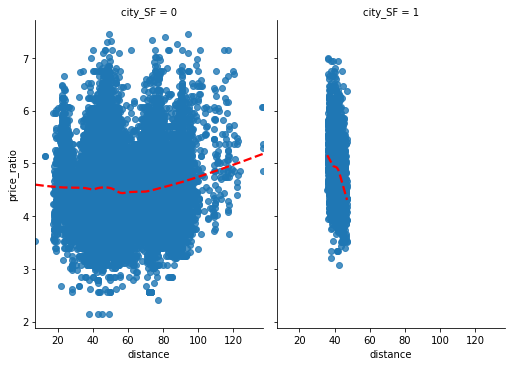

In [222]:
# trellis plot. distance와 city_SF의 interaciton 이 있는 것으로 보임 
sns.lmplot(x='distance', y='price_ratio', data=Airbnb_dum, col='city_SF',line_kws={'color':'red', 'linestyle':'dashed'}, lowess=True, aspect=0.7)
plt.show()

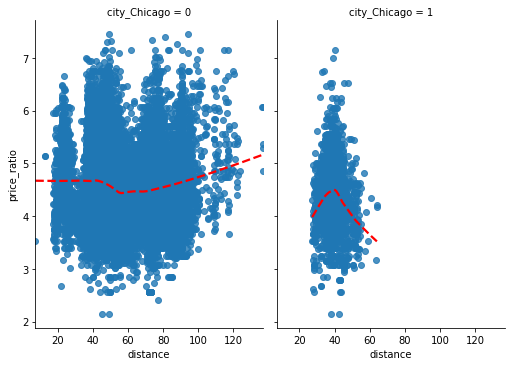

In [223]:
sns.lmplot(x='distance', y='price_ratio', data=Airbnb_dum, col='city_Chicago',line_kws={'color':'red', 'linestyle':'dashed'}, lowess=True, aspect=0.7)
plt.show()

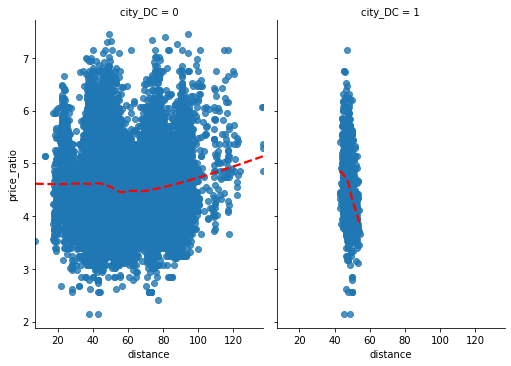

In [224]:
sns.lmplot(x='distance', y='price_ratio', data=Airbnb_dum, col='city_DC',line_kws={'color':'red', 'linestyle':'dashed'}, lowess=True, aspect=0.7)
plt.show()

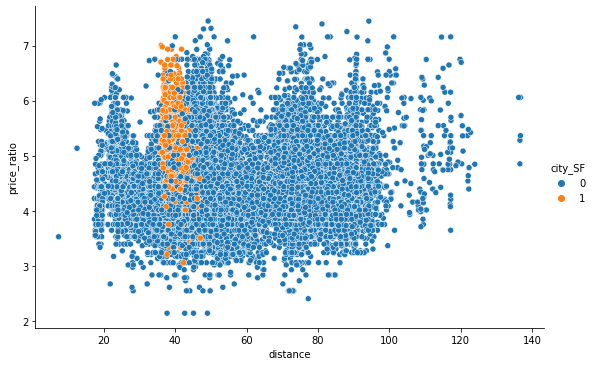

In [248]:
sns.relplot(x='distance', y='price_ratio', data=Airbnb_dum, hue='city_SF', aspect=1.5)  
plt.show()

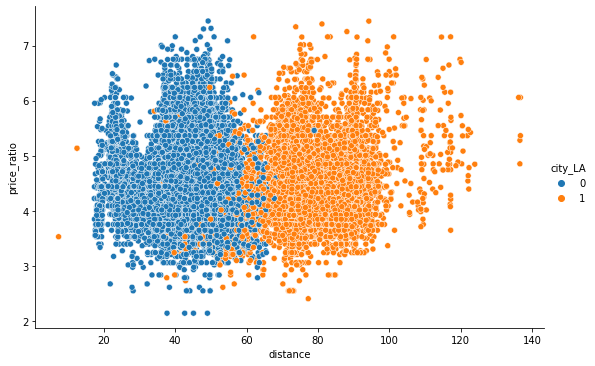

In [249]:
sns.relplot(x='distance', y='price_ratio', data=Airbnb_dum, hue='city_LA', aspect=1.5)  
plt.show()

#### 5) model3. interaction추가
* city와 distance , room_type과 distance, room_type과 city, bedrooms와 city, accommodates와 property_type, accomodates와 bathrooms, accomodates와 bed_type, accomodates와 beds, accomodates와 bedrooms 의 interaction을 추가함. 
* R-square = 0.662


In [311]:
model3 = smf.ols(formula = 'price_ratio ~ property_type_House+room_type_Private+room_type_Shared+amenities+accommodates+bathrooms+bed_type_Bed+cancellation_policy+city_Chicago+city_DC+city_LA+city_NYC+city_SF+description+host_response_rate+instant_bookable_t+review_scores_rating+bedrooms+beds+distance+distance:city_LA+distance:city_Chicago+distance:city_DC+distance:city_NYC+distance:city_SF+room_type_Private:bedrooms+room_type_Shared:bedrooms+room_type_Private:distance+room_type_Shared:distance+distance:review_scores_rating+room_type_Private:city_Chicago+room_type_Private:city_DC+room_type_Private:city_LA+room_type_Private:city_NYC+room_type_Private:city_SF+room_type_Shared:city_SF+room_type_Shared:city_Chicago+room_type_Shared:city_LA+room_type_Shared:city_NYC+room_type_Shared:city_DC++bedrooms:city_SF+bedrooms:city_Chicago+bedrooms:city_LA+bedrooms:city_NYC+bedrooms:city_DC+accommodates:property_type_House+accommodates:bathrooms+accommodates:bed_type_Bed+accommodates:beds+accommodates:bedrooms',
                data = Airbnb_dum)
result3=model3.fit()

In [312]:
result3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            price_ratio   R-squared:                       0.662
Model:                            OLS   Adj. R-squared:                  0.662
Method:                 Least Squares   F-statistic:                     1149.
Date:                Mon, 29 Mar 2021   Prob (F-statistic):               0.00
Time:                        05:02:05   Log-Likelihood:                -12166.
No. Observations:               28785   AIC:                         2.443e+04
Df Residuals:                   28735   BIC:                         2.485e+04
Df Model:                          49                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercept                            3.7388      0.179     20.930      0.000       3.389       4.089
property_type_House                 -0.0840      0.010     -8.503      0.000      -0.103      -0.065
room_type_Private                   -0.5422      0.030    -18.238      0.000      -0.600      -0.484
room_type_Shared                    -0.3861      0.048     -8.066      0.000      -0.480      -0.292
amenities                            0.0036      0.000     10.466      0.000       0.003       0.004
accommodates                         0.0620      0.011      5.846      0.000       0.041       0.083
bathrooms                            0.0385      0.009      4.459      0.000       0.022       0.055
bed_type_Bed                         0.0609      0.028      2.211      0.027       0.007       0.115
cancellation_policy                  0.0402      0.003     12.595      0.000       0.034       0.046
city_Chicago                        -0.5582      0.118     -4.712      0.000      -0.790      -0.326
city_DC                              3.9073      0.246     15.855      0.000       3.424       4.390
city_LA                             -1.2292      0.103    -11.978      0.000      -1.430      -1.028
city_NYC                             0.1696      0.103      1.649      0.099      -0.032       0.371
city_SF                              1.8028      0.152     11.865      0.000       1.505       2.101
description                       1.955e-05   9.74e-06      2.007      0.045    4.61e-07    3.86e-05
host_response_rate                  -0.1656      0.016    -10.486      0.000      -0.197      -0.135
instant_bookable_t                  -0.0375      0.005     -7.594      0.000      -0.047      -0.028
review_scores_rating                 0.0107      0.002      6.755      0.000       0.008       0.014
bedrooms                             0.0872      0.013      6.572      0.000       0.061       0.113
beds                                 0.0003      0.005      0.066      0.947      -0.009       0.010
distance                            -0.0166      0.005     -3.394      0.001      -0.026      -0.007
distance:city_LA                     0.0173      0.004      4.091      0.000       0.009       0.026
distance:city_Chicago                0.0048      0.005      1.071      0.284      -0.004       0.014
distance:city_DC                    -0.0849      0.006    -13.420      0.000      -0.097      -0.072
distance:city_NYC                   -0.0015      0.004     -0.343      0.731      -0.010       0.007
distance:city_SF                    -0.0411      0.005     -8.077      0.000      -0.051      -0.031
room_type_Private:bedrooms          -0.0950      0.016     -6.022      0.000      -0.126      -0.064
room_type_Shared:bedrooms           -0.3861      0.04

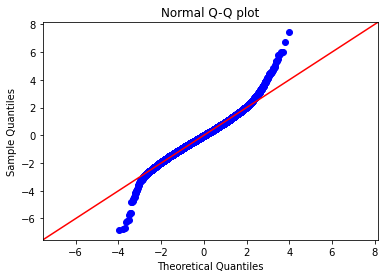

In [300]:
# 모델 진단 - 정규성 
sm.qqplot(result3.resid, fit=True, line='45')
plt.title("Normal Q-Q plot")
plt.show()

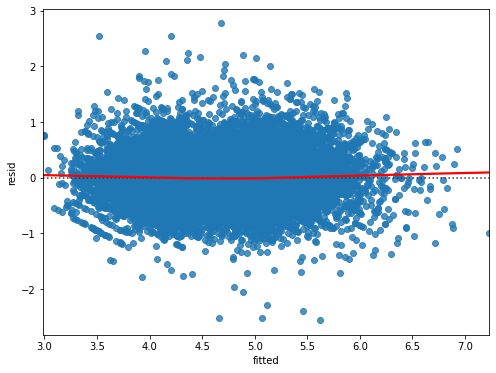

In [301]:
# 모델 진단 - 등분산성
plt.subplots(figsize=(8,6))
eqvar = pd.DataFrame({'fitted': result1.fittedvalues, 'resid' : result1.resid })
sns.residplot(x='fitted', y='resid', data=eqvar, line_kws={'color':'red'}, lowess=True)
plt.show()

#### 6) interaction 포함해 feature selection 진행 => model 4
* 종속변수에 영향을 미치지 않는 변수들이 삭제되었음.

In [294]:
X["distance:city_LA"] = X["distance"]*X["city_LA"]
X["distance:city_Chicago"] = X["distance"]*X["city_Chicago"]
X["distance:city_DC"] = X["distance"]*X["city_DC"]
X["distance:city_SF"] = X["distance"]*X["city_SF"]
X["distance:city_NYC"] = X["distance"]*X["city_NYC"]
                                         
X["room_type_Private:city_LA"] = X["room_type_Private"]*X["city_LA"]
X["room_type_Private:city_Chicago"] = X["room_type_Private"]*X["city_Chicago"]
X["room_type_Private:city_DC"] = X["room_type_Private"]*X["city_DC"]
X["room_type_Private:city_SF"] = X["room_type_Private"]*X["city_SF"]
X["room_type_Private:city_NYC"] = X["room_type_Private"]*X["city_NYC"]

X["room_type_Shared:city_LA"] = X["room_type_Shared"]*X["city_LA"]
X["room_type_Shared:city_Chicago"] = X["room_type_Shared"]*X["city_Chicago"]
X["room_type_Shared:city_DC"] = X["room_type_Shared"]*X["city_DC"]
X["room_type_Shared:city_SF"] = X["room_type_Shared"]*X["city_SF"]
X["room_type_Shared:city_NYC"] = X["room_type_Shared"]*X["city_NYC"]

X["bedrooms:city_LA"] = X["bedrooms"]*X["city_LA"]
X["bedrooms:city_Chicago"] = X["bedrooms"]*X["city_Chicago"]
X["bedrooms:city_DC"] = X["bedrooms"]*X["city_DC"]
X["bedrooms:city_SF"] = X["bedrooms"]*X["city_SF"]
X["bedrooms:city_NYC"] = X["bedrooms"]*X["city_NYC"]

X["room_type_Private:bedrooms"] = X["room_type_Shared"]*X["bedrooms"]
X["room_type_Shared:bedrooms"] = X["room_type_Shared"]*X["bedrooms"]

X["distance:room_type_Shared"]=X["distance"]*X["room_type_Shared"]
X["distance:room_type_Private"]=X["distance"]*X["room_type_Private"]
X["distance:review_scores_rating"]=X["distance"]*X["review_scores_rating"]

X["accommodates:property_type_House"]=X["accommodates"]*X["property_type_House"]
X["accommodates:bathrooms"]=X["accommodates"]*X["bathrooms"]
X["accommodates:bed_type_Bed"]=X["accommodates"]*X["bed_type_Bed"]
X["accommodates:beds"]=X["accommodates"]*X["beds"]
X["accommodates:bedrooms"]=X["accommodates"]*X["bedrooms"]

In [295]:
fsel.backwardSelection(X, y, model_type='linear', elimination_criteria='aic')

Character Variables (Dummies Generated, First Dummies Dropped): []
Eliminated : cleaning_fee_True
Eliminated : room_type_Private:city_LA
Eliminated : host_has_profile_pic_t
Eliminated : beds
Eliminated : accommodates:bed_type_Bed
Eliminated : distance:city_NYC
Eliminated : number_of_reviews
Eliminated : description
Regained :  description
                            OLS Regression Results                            
Dep. Variable:            price_ratio   R-squared:                       0.662
Model:                            OLS   Adj. R-squared:                  0.661
Method:                 Least Squares   F-statistic:                     1223.
Date:                Mon, 29 Mar 2021   Prob (F-statistic):               0.00
Time:                        04:24:22   Log-Likelihood:                -12180.
No. Observations:               28785   AIC:                         2.445e+04
Df Residuals:                   28738   BIC:                         2.484e+04
Df Model:                  

['intercept',
 'amenities',
 'accommodates',
 'bathrooms',
 'cancellation_policy',
 'description',
 'host_response_rate',
 'review_scores_rating',
 'bedrooms',
 'distance',
 'room_type_Private',
 'room_type_Shared',
 'city_Chicago',
 'city_DC',
 'city_LA',
 'city_NYC',
 'city_SF',
 'host_identity_verified_t',
 'instant_bookable_t',
 'property_type_Apartment',
 'property_type_House',
 'bed_type_Bed',
 'distance:city_LA',
 'distance:city_Chicago',
 'distance:city_DC',
 'distance:city_SF',
 'room_type_Private:city_Chicago',
 'room_type_Private:city_DC',
 'room_type_Private:city_SF',
 'room_type_Private:city_NYC',
 'room_type_Shared:city_LA',
 'room_type_Shared:city_Chicago',
 'room_type_Shared:city_DC',
 'room_type_Shared:city_SF',
 'room_type_Shared:city_NYC',
 'bedrooms:city_LA',
 'bedrooms:city_Chicago',
 'bedrooms:city_DC',
 'bedrooms:city_SF',
 'bedrooms:city_NYC',
 'room_type_Private:bedrooms',
 'room_type_Shared:bedrooms',
 'distance:room_type_Shared',
 'distance:room_type_Private'

#### 7) model 4 (최종 모델) - interaction 반영, feature selection 진행
* interaction을 반영한 모델에서 feature selection 을 진행한 후의 변수를 사용하여 model fitting
* r-squared = 0.662
* 사용된 모든 변수들이 종속변수에 유의미한 영향을 끼친다. 
* qq plot을 통한 정규성 가정 진단 결과 정규분포보다는 꼬리가 두껍지만, 대칭이며 정규성 가정에서 크게 벗어나지 않는다고 할 수 있다. 
* residual plot을 통한 등분산 가정 진단 결과 등분산을 만족한 다고 볼 수 있다. 

In [302]:
model4 = smf.ols(formula = 'price_ratio ~ property_type_House+room_type_Private+room_type_Shared+amenities+accommodates+bathrooms+bed_type_Bed+cancellation_policy+city_Chicago+city_DC+city_LA+city_NYC+city_SF+description+host_response_rate+instant_bookable_t+review_scores_rating+bedrooms+distance+distance:city_LA+distance:city_Chicago+distance:city_DC+distance:city_SF+room_type_Private:bedrooms+room_type_Shared:bedrooms+room_type_Private:distance+room_type_Shared:distance+distance:review_scores_rating+room_type_Private:city_Chicago+room_type_Private:city_DC+room_type_Private:city_NYC+room_type_Private:city_SF+room_type_Shared:city_SF+room_type_Shared:city_Chicago+room_type_Shared:city_LA+room_type_Shared:city_NYC+room_type_Shared:city_DC++bedrooms:city_SF+bedrooms:city_Chicago+bedrooms:city_LA+bedrooms:city_NYC+bedrooms:city_DC+accommodates:property_type_House+accommodates:bathrooms++accommodates:beds+accommodates:bedrooms',
                data = Airbnb_dum)
result4=model4.fit()

In [303]:
result4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            price_ratio   R-squared:                       0.662
Model:                            OLS   Adj. R-squared:                  0.662
Method:                 Least Squares   F-statistic:                     1252.
Date:                Mon, 29 Mar 2021   Prob (F-statistic):               0.00
Time:                        04:31:36   Log-Likelihood:                -12166.
No. Observations:               28785   AIC:                         2.442e+04
Df Residuals:                   28739   BIC:                         2.480e+04
Df Model:                          45                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercept                            3.7804      0.151     25.040      0.000       3.485       4.076
property_type_House                 -0.0839      0.010     -8.496      0.000      -0.103      -0.065
room_type_Private                   -0.5413      0.030    -18.315      0.000      -0.599      -0.483
room_type_Shared                    -0.3866      0.048     -8.079      0.000      -0.480      -0.293
amenities                            0.0037      0.000     10.492      0.000       0.003       0.004
accommodates                         0.0577      0.003     21.972      0.000       0.053       0.063
bathrooms                            0.0387      0.009      4.539      0.000       0.022       0.055
bed_type_Bed                         0.0509      0.014      3.515      0.000       0.023       0.079
cancellation_policy                  0.0401      0.003     12.590      0.000       0.034       0.046
city_Chicago                        -0.5919      0.069     -8.524      0.000      -0.728      -0.456
city_DC                              3.8720      0.227     17.046      0.000       3.427       4.317
city_LA                             -1.2635      0.034    -36.883      0.000      -1.331      -1.196
city_NYC                             0.1344      0.025      5.453      0.000       0.086       0.183
city_SF                              1.7693      0.118     14.968      0.000       1.538       2.001
description                       1.957e-05   9.74e-06      2.010      0.044    4.88e-07    3.87e-05
host_response_rate                  -0.1656      0.016    -10.491      0.000      -0.197      -0.135
instant_bookable_t                  -0.0375      0.005     -7.600      0.000      -0.047      -0.028
review_scores_rating                 0.0107      0.002      6.764      0.000       0.008       0.014
bedrooms                             0.0875      0.013      6.861      0.000       0.063       0.113
distance                            -0.0180      0.003     -6.921      0.000      -0.023      -0.013
distance:city_LA                     0.0188      0.001     28.097      0.000       0.017       0.020
distance:city_Chicago                0.0063      0.002      3.716      0.000       0.003       0.010
distance:city_DC                    -0.0834      0.005    -17.580      0.000      -0.093      -0.074
distance:city_SF                    -0.0396      0.003    -13.691      0.000      -0.045      -0.034
room_type_Private:bedrooms          -0.0950      0.016     -6.023      0.000      -0.126      -0.064
room_type_Shared:bedrooms           -0.3866      0.048     -8.079      0.000      -0.480      -0.293
room_type_Private:distance           0.0011      0.000      3.147      0.002       0.000       0.002
room_type_Shared:distance            0.0045      0.00

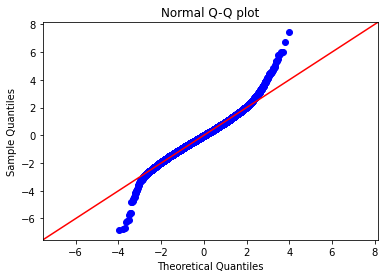

In [304]:
# 모델 진단 - 정규성 
sm.qqplot(result3.resid, fit=True, line='45')
plt.title("Normal Q-Q plot")
plt.show()

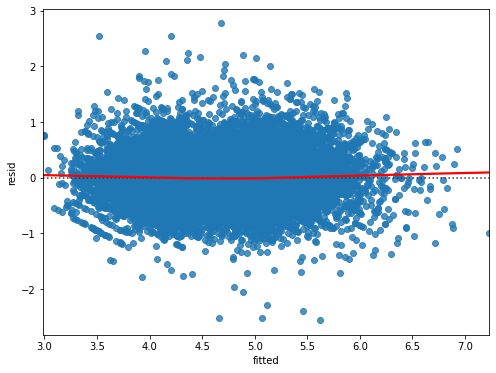

In [305]:
# 모델 진단 - 등분산성
plt.subplots(figsize=(8,6))
eqvar = pd.DataFrame({'fitted': result1.fittedvalues, 'resid' : result1.resid })
sns.residplot(x='fitted', y='resid', data=eqvar, line_kws={'color':'red'}, lowess=True)
plt.show()

## 3. 선형회귀분석 수행결과 해석

####  최종 모델 : model 4 (interaction추가, feature selection 진행)
1. 설명력 ($R^2$) = 0.662 
    * 해당 지역 내 상대적인 가격을 나타내는 로그 가격비의 변동량의 약 66.2%는 독립변수인 집의 유형, 방의 유형, 편의시설의 개수, 수용인원, 화장실의 개수, 침대의 유형, 환불 규정의 엄격성, 위치한 도시, 소개문의 길이, 응답률, 즉시 예약가능여부, 리뷰 평점, 침실개수, 도심과의 거리와 도심까지의 거리&도시, 방의 유형&도시, 침실 개수&도시, 방의 유형&도심까지이 거리, 수용인원&집의 유형, 수용인원&화장실 개수, 수용인원&침실 개수, 수용인원&침대 개수의 interaction으로 설명가능하다. 

2. p-value 
    * 최종 모델의 결과인 result4의 summary를 보면 모든 변수에 대한 p-value가 0.05보다 작음을 알 수 있다. 
    * 이를 통해 앞서 서술한 독립변수가 종속변수에 미치는 영향이 유의미하다고 해석할 수 있다. 

3. 기울기
    * 편의시설의 개수(amenities)가 1개 늘어날 수록 로그가격비는 약 0.0037만큼 늘어난다. 즉, 편의시설 개수가 하나 많아지면 해당 도시의 평균에 비해 주택의 1일 이용가격은 약 1.0037%($e^{0.0037}$%) 비싸진다. 
    * 환불 규정이 한단계 엄격해질 때 로그가격비는 0.0401만큼 늘어난다. 
    * 호스트의 응답률이 10% 높아질때 로그가격비는 0.0165만큼 줄어든다. 
    * 리뷰의 평점이 1% 높아질 때 로그가격비는 0.0107만큼 늘어난다.     
    * 수용인원(accomodates)의 경우 집의 유형, 화장실 개수, 침실 개수, 침대 개수와 interaction이 있기 때문에 기울기를 그대로 해석할 수 없음. 
    * 소개문의 길이(description)의 기울기는 0이므로 소개문의 길이에 따라 가격이 비싸진다고 볼 수 없다. 

In [313]:
round(result4.params,4)

Intercept                           3.7804
property_type_House                -0.0839
room_type_Private                  -0.5413
room_type_Shared                   -0.3866
amenities                           0.0037
accommodates                        0.0577
bathrooms                           0.0387
bed_type_Bed                        0.0509
cancellation_policy                 0.0401
city_Chicago                       -0.5919
city_DC                             3.8720
city_LA                            -1.2635
city_NYC                            0.1344
city_SF                             1.7693
description                         0.0000
host_response_rate                 -0.1656
instant_bookable_t                 -0.0375
review_scores_rating                0.0107
bedrooms                            0.0875
distance                           -0.0180
distance:city_LA                    0.0188
distance:city_Chicago               0.0063
distance:city_DC                   -0.0834
distance:ci

4. 모델 진단 결과
    * qqplot과 residual plot을 통해 정규성 및 등분산 가정을 점검한 결과 해당 모델은 정규성 및 등분산 가정을 충족한다고 볼수 있다. (그래프 참고)